In [ ]:
# This code is for reference only, it is from a previous setup that was then replaced by voter

/usr/local/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:210: Attribute 'model_body' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model_body'])`.
/usr/local/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:210: Attribute 'loss_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss_fn'])`.
/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores


1344



  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
/usr/local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


Train Time (s): 110.63023567199707


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │          0.78125          │
│         test_loss         │    0.5368520021438599     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 5.979645013809204


<Figure size 1600x1600 with 0 Axes>

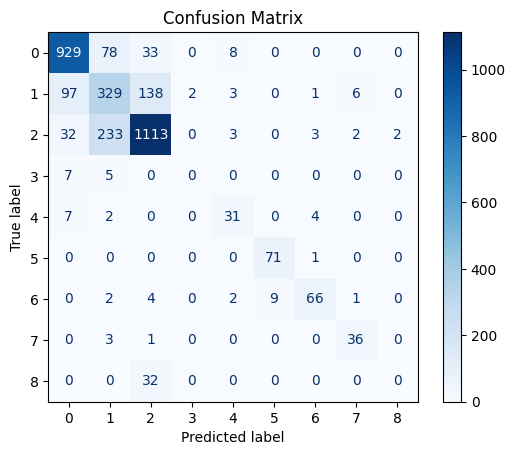

Logger Metics:  logs/model_v1/version_1/metrics.csv


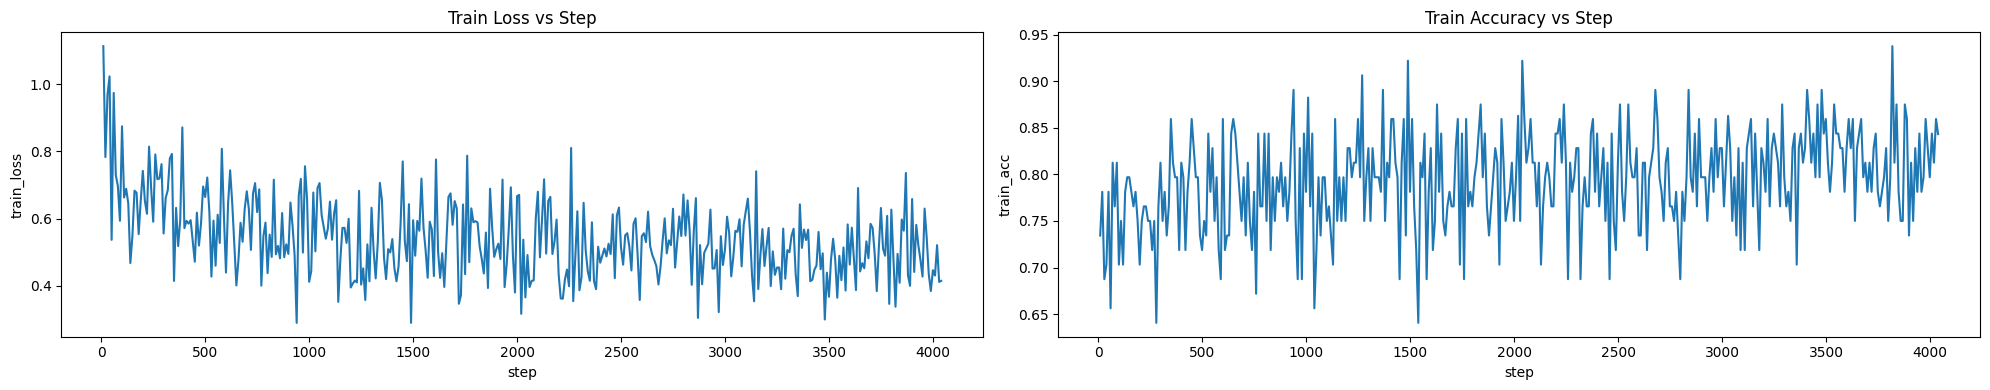

done


In [1]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_classes = len(LABELS) #9
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_v1" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 20
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:210: Attribute 'model_body' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model_body'])`.
/usr/local/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:210: Attribute 'loss_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss_fn'])`.
/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Par

1344


/usr/local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 92.7219877243042


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7809466123580933     │
│         test_loss         │    0.5829970836639404     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 9.184267520904541


<Figure size 1600x1600 with 0 Axes>

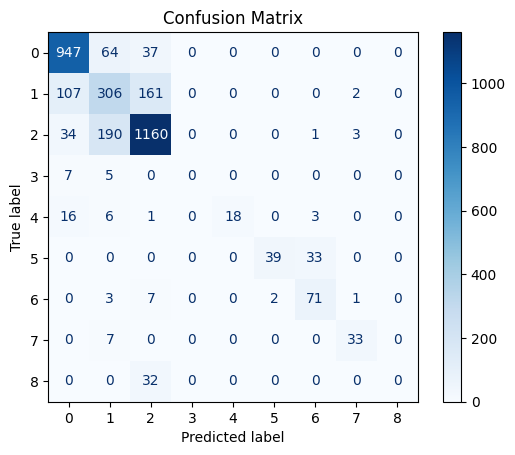

Logger Metics:  logs/model_v2/version_0/metrics.csv


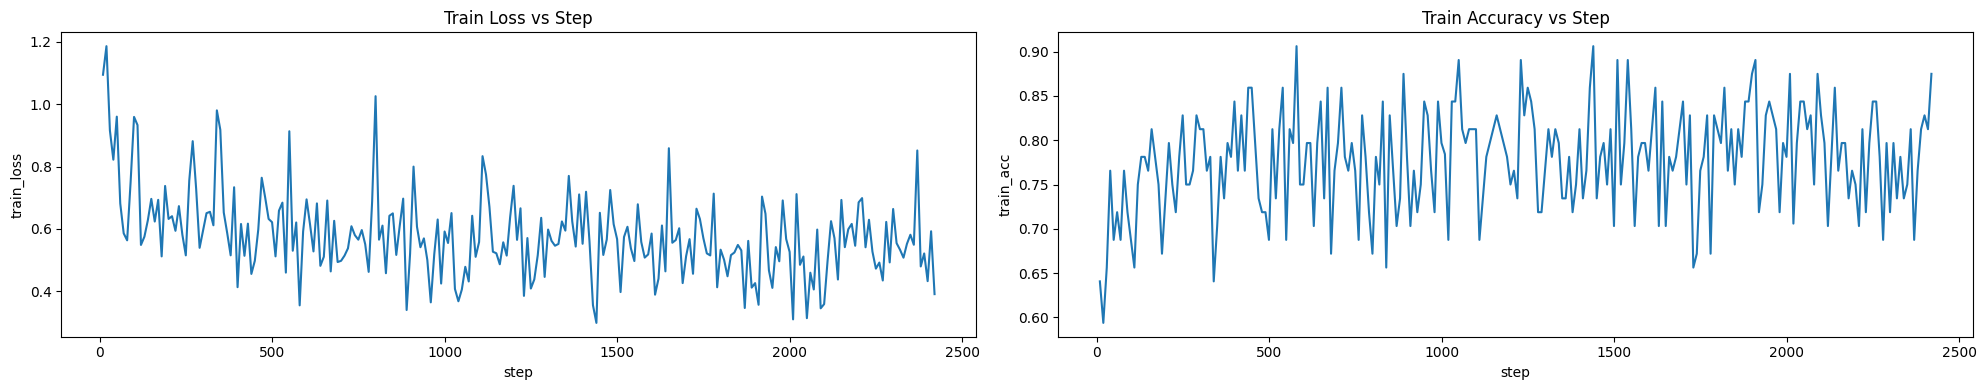

done


In [2]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_classes = len(LABELS) #9
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_v2" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
loss_fn = nn.CrossEntropyLoss()
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 1.4 M  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.736     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


weights:  tensor([0.7826, 0.8609, 0.7826, 1.5652, 0.8609, 0.8609, 0.8609, 0.8609, 1.5652])
num features:  1344


/usr/local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 81.71648263931274


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7891383767127991     │
│         test_loss         │    0.5720232725143433     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.5031116008758545


<Figure size 1600x1600 with 0 Axes>

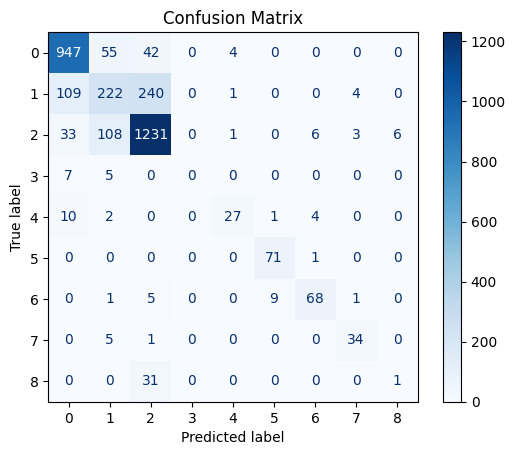

Logger Metics:  logs/model_v2/version_1/metrics.csv


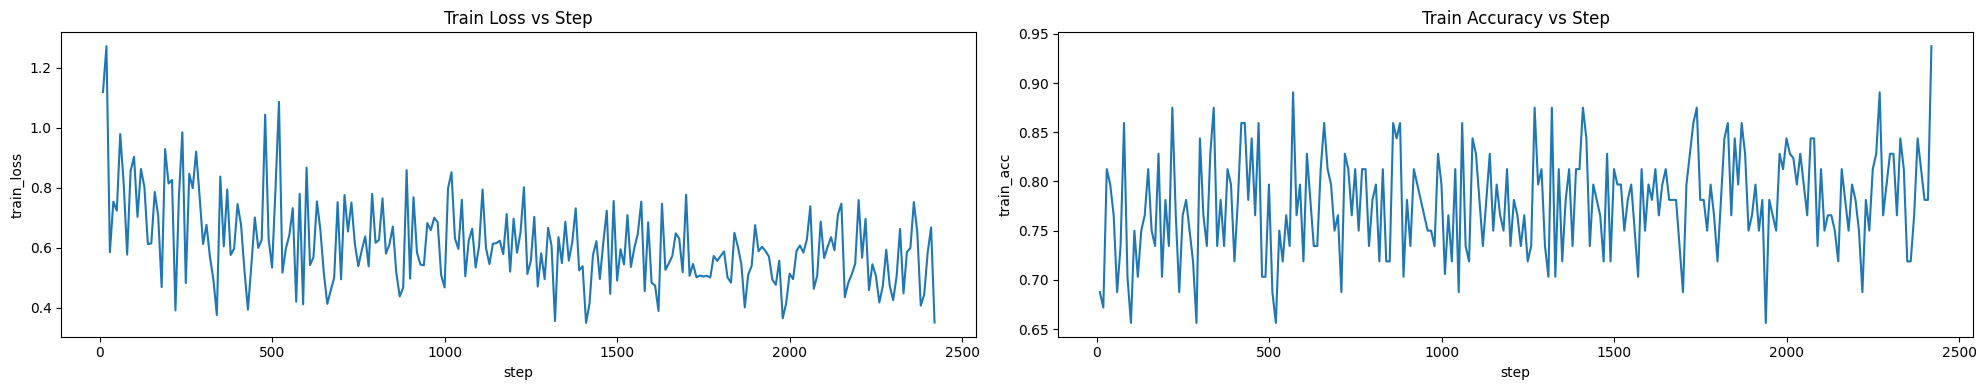

done


In [2]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_classes = len(LABELS) #9
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_v3" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 700),
    nn.ReLU(),
    nn.Linear(700, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relative_weights = [1, 1.1, 1, 2, 1.1, 1.1, 1.1, 1.1, 2]
weights = torch.tensor(relative_weights, dtype=torch.float)
weights = weights / weights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
print("weights: ", weights)
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode
/usr/local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is s

weights:  tensor([0.5143, 0.7714, 0.5143, 2.5714, 0.7714, 0.7714, 0.7714, 0.7714, 1.5429])
num features:  1344


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 64.75967264175415


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7672936916351318     │
│         test_loss         │    0.6523135900497437     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.6350810527801514


<Figure size 1600x1600 with 0 Axes>

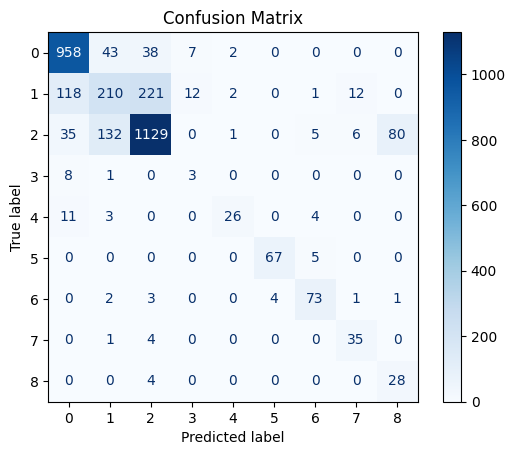

Logger Metics:  logs/model_v4/version_0/metrics.csv


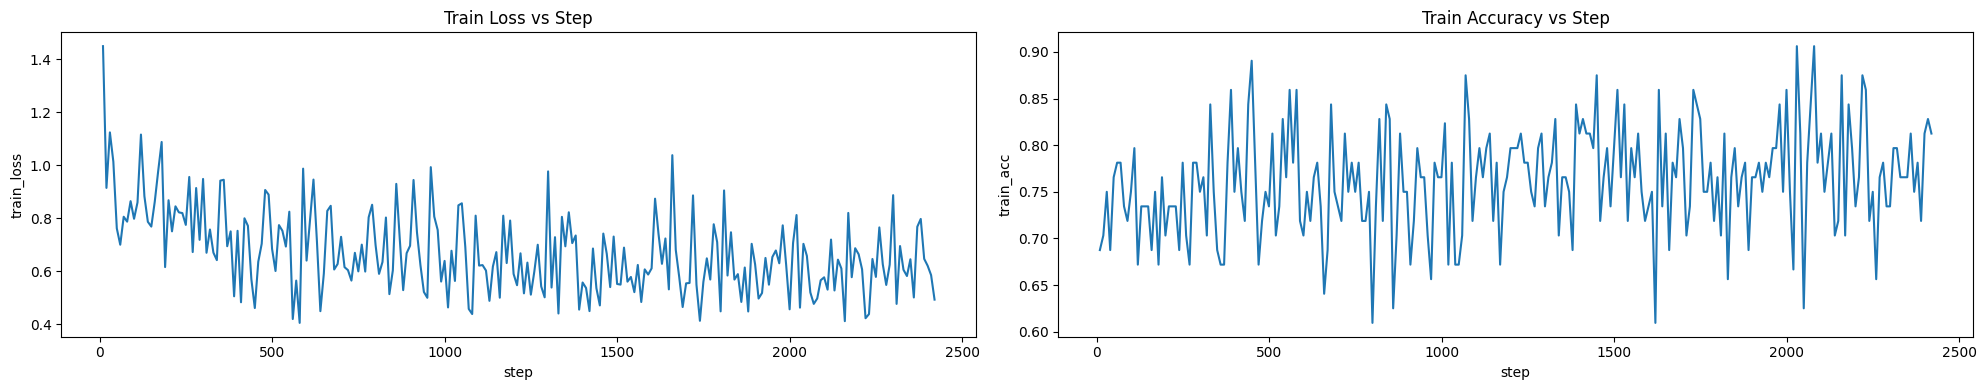

done


In [3]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_classes = len(LABELS) #9
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_v4" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relative_weights = [1, 1.5, 1, 5, 1.5, 1.5, 1.5, 1.5, 3]
weights = torch.tensor(relative_weights, dtype=torch.float)
weights = weights / weights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
print("weights: ", weights)
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


weights:  tensor([0.0370, 0.0370, 0.0370, 2.5926, 1.1111, 1.1111, 1.1111, 1.1111, 1.8519])
num features:  1344


/usr/local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 64.01141858100891


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7254247665405273     │
│         test_loss         │    0.4759088456630707     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.4773402214050293


<Figure size 1600x1600 with 0 Axes>

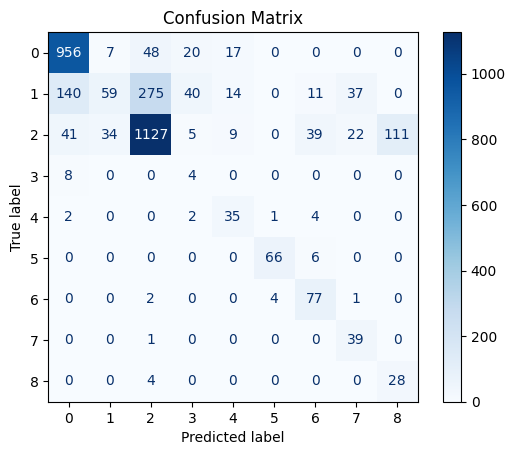

Logger Metics:  logs/model_v5/version_0/metrics.csv


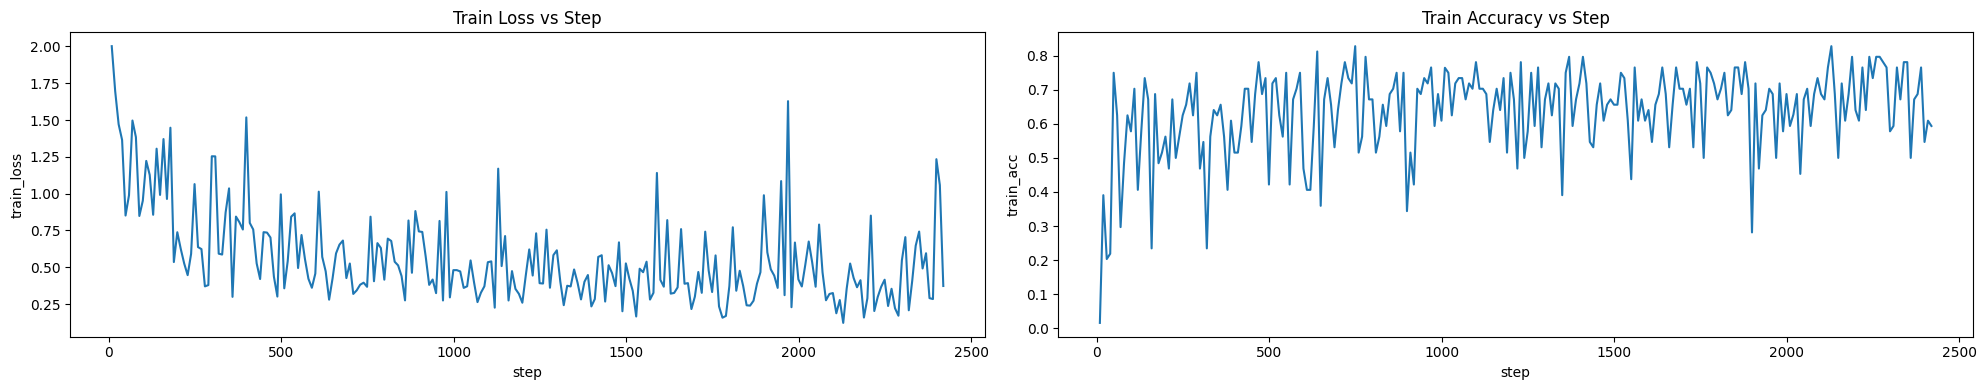

done


In [1]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_classes = len(LABELS) #9
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_v5" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relative_weights = [.1, .1, .1, 7, 3, 3, 3, 3, 5]
weights = torch.tensor(relative_weights, dtype=torch.float)
weights = weights / weights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
print("weights: ", weights)
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 820 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
820 K     Trainable params
0         Non-trainable params
820 K     Total params
3.282     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


weights:  tensor([1.8182, 0.1818])
num features:  1344


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 63.366904973983765


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8616504669189453     │
│         test_loss         │    0.19547195732593536    │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.682677984237671


<Figure size 1600x1600 with 0 Axes>

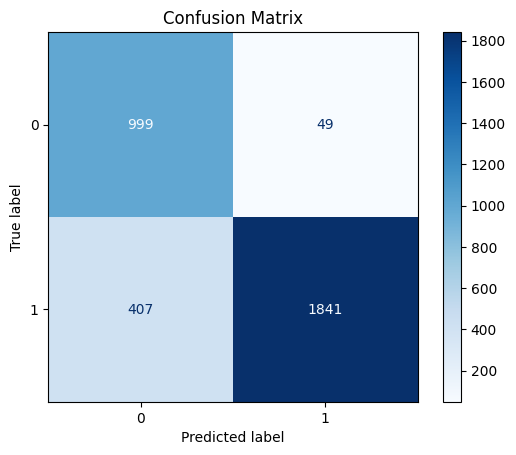

Logger Metics:  logs/model_miniclassify0/version_2/metrics.csv


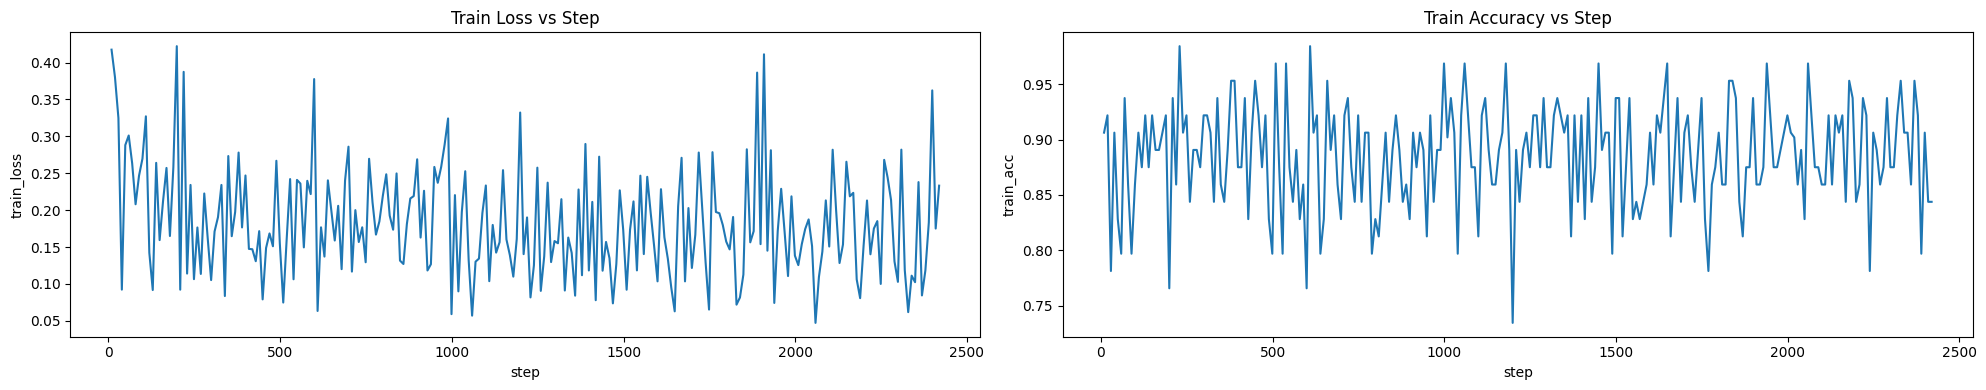

done


In [2]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
relabel = {0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1}
train_loader = DS.get_loader(train_filepaths, relabel=relabel, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, relabel=relabel, batch_size=64, num_workers=63)

num_classes = 2 # class 0 or other called class 1
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_miniclassify0" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relative_weights = [10, 1]
weights = torch.tensor(relative_weights, dtype=torch.float)
weights = weights / weights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
print("weights: ", weights)
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()
print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 820 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
820 K     Trainable params
0         Non-trainable params
820 K     Total params
3.282     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


weights:  tensor([1., 1.])
num features:  1344


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 62.827476263046265


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9723907709121704     │
│         test_loss         │    0.08343219757080078    │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.3949055671691895


<Figure size 1600x1600 with 0 Axes>

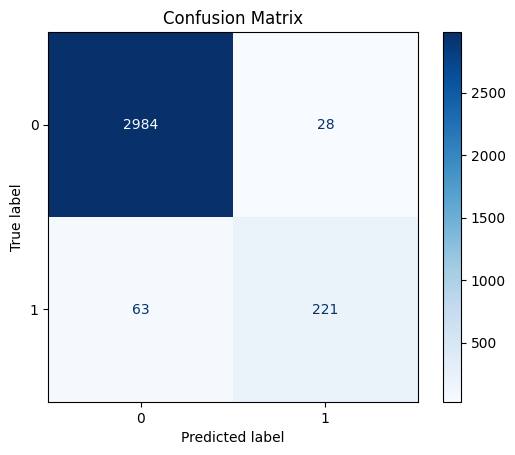

[[1046    2]
 [ 568    8]
 [1370   18]
 [  12    0]
 [  12   32]
 [   0   72]
 [   7   77]
 [   6   34]
 [  26    6]]
Logger Metics:  logs/model_binary0to2or3to8/version_3/metrics.csv


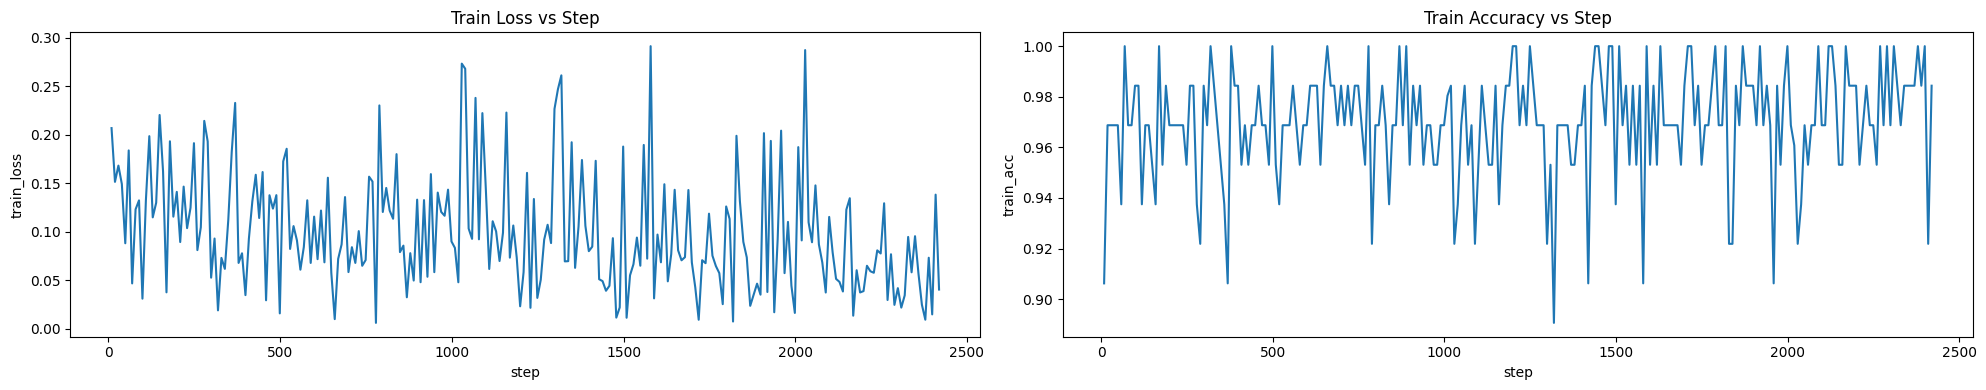

done


In [1]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
relabel = {0:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1}
train_loader = DS.get_loader(train_filepaths, relabel=relabel, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, relabel=relabel, batch_size=64, num_workers=63)
no_relabel_test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63) #used to create confusion matrix of all 8 classes not just bianry

num_classes = 2 # class 0 or other called class 1
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_binary0to2or3to8" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relative_weights = [1, 1]
weights = torch.tensor(relative_weights, dtype=torch.float)
weights = weights / weights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
print("weights: ", weights)
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.relabeled_confusion_table(no_relabel_test_loader, num_classes=len(LABELS), relabel=relabel)
manager.plot_logger()

print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 853 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
853 K     Trainable params
0         Non-trainable params
853 K     Total params
3.412     Total estimated model params size (MB)
9         Modules in train mode
0         Modules in eval mode


weights:  tensor([1., 1.])
num features:  1344


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 62.951908826828


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9684466123580933     │
│         test_loss         │    0.09914971888065338    │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.5745270252227783


<Figure size 1600x1600 with 0 Axes>

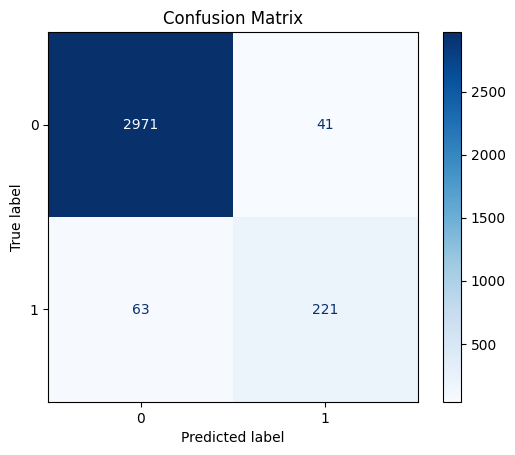

[[1048    0]
 [ 569    7]
 [1354   34]
 [  12    0]
 [  13   31]
 [   0   72]
 [   8   76]
 [   6   34]
 [  24    8]]
Logger Metics:  logs/model_binary0to2or3to8/version_4/metrics.csv


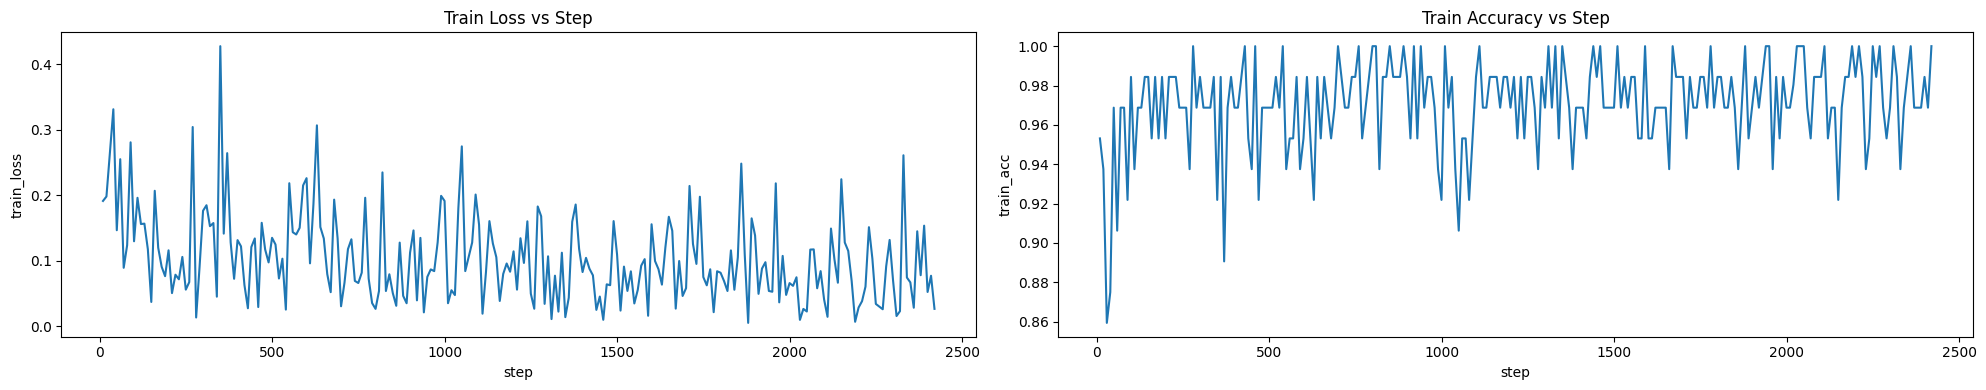

done


In [2]:
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
relabel = {0:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1}
train_loader = DS.get_loader(train_filepaths, relabel=relabel, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, relabel=relabel, batch_size=64, num_workers=63)
no_relabel_test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63) #used to create confusion matrix of all 8 classes not just bianry

num_classes = 2 # class 0 or other called class 1
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_binary0to2or3to8" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, num_classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relative_weights = [1, 1]
weights = torch.tensor(relative_weights, dtype=torch.float)
weights = weights / weights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
print("weights: ", weights)
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.relabeled_confusion_table(no_relabel_test_loader, num_classes=len(LABELS), relabel=relabel)
manager.plot_logger()

print("done")

/usr/local/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model_body | Sequential       | 822 K  | train
1 | loss_fn    | CrossEntropyLoss | 0      | train
--------------------------------------------------------
822 K     Trainable params
0         Non-trainable params
822 K     Total params
3.289     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


weights:  tensor([0.1459, 0.1946, 0.1459, 1.9459, 1.2162, 1.2162, 1.2162, 1.2162, 1.7027])
num features:  1344


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=12` reached.


Train Time (s): 63.379695653915405


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7463592290878296     │
│         test_loss         │    0.5947273373603821     │
└───────────────────────────┴───────────────────────────┘

Test Time (s): 1.418799877166748


<Figure size 1600x1600 with 0 Axes>

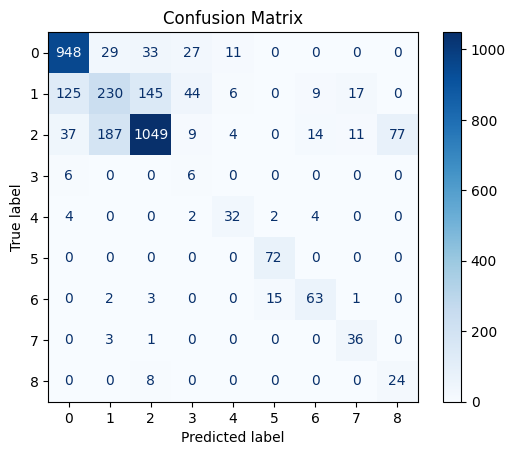

Logger Metics:  logs/model_new_weights/version_0/metrics.csv


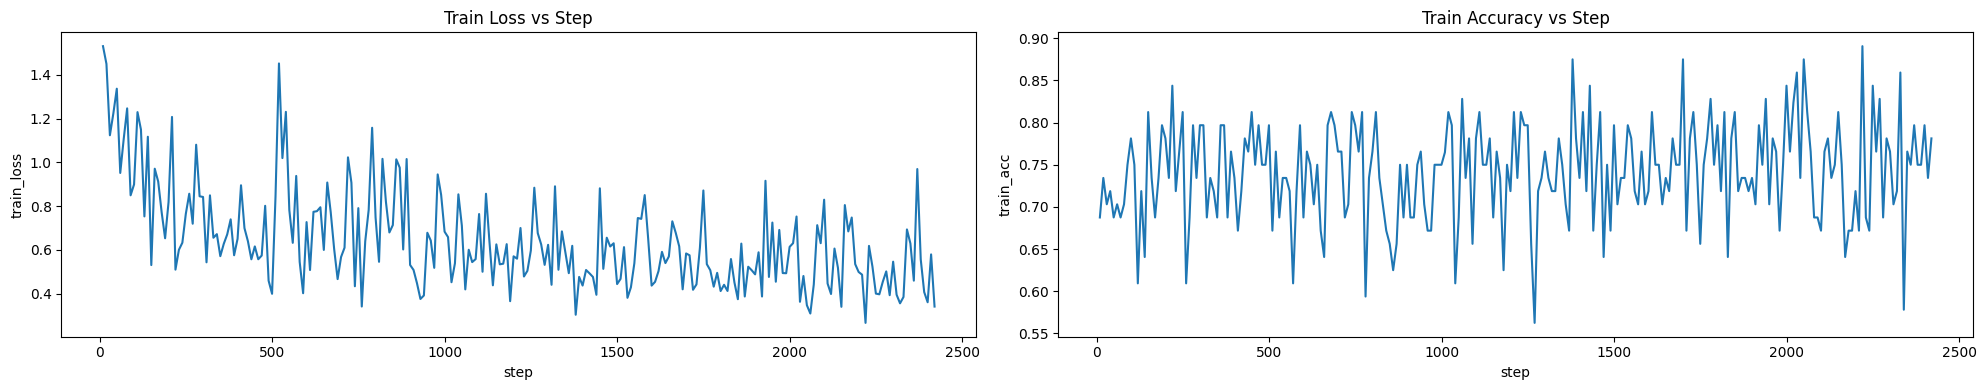

done


In [ ]:
# showcase
import torch
import torch.nn as nn
from constants import LABELS
from my_dataset import MyDataset as DS
from model_manager import ModelManager as Manager
from model_manager import MyNN

train_filepaths = ["standard1/train.csv"]
test_filepaths = ["standard1/test.csv"]
train_loader = DS.get_loader(train_filepaths, shuffle=True, batch_size=64, num_workers=63)
test_loader = DS.get_loader(test_filepaths, batch_size=64, num_workers=63)

num_classes = 9 # class 0 or other called class 1
num_features = train_loader.dataset.datasets[0].num_features
model_name = "model_new_weights" #### REMEMBER TO CHANGE THE NAME
model_class = MyNN
max_epochs = 12
model_body = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, num_classes))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
relative_weights = [.3, .4, .3, 4, 2.5, 2.5, 2.5, 2.5, 3.5]
weights = torch.tensor(relative_weights, dtype=torch.float)
weights = weights / weights.mean()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))
print("weights: ", weights)
print("num features: ", num_features)

manager = Manager(model_name, max_epochs, model_class, model_body, loss_fn)
manager.train(train_loader)
manager.test(test_loader)
manager.confustion_matrix(test_loader, num_classes)
manager.plot_logger()

print("done")

#combined voting
#classify as 0 or 2 or other, classify as 1 or other, classify as the rest or other.